In [2]:
import pandas as pd

replay_buf = pd.read_pickle("../../data/RetailRocket/replay_buffer.df")
replay_buf

,state,len_state,action,is_buy,next_state,len_next_states,is_done
0,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",1,49432,0,"[49432, 70852, 70852, 70852, 70852, 70852, 708...",1,False
1,"[49432, 70852, 70852, 70852, 70852, 70852, 708...",1,49432,0,"[49432, 49432, 70852, 70852, 70852, 70852, 708...",2,False
2,"[49432, 49432, 70852, 70852, 70852, 70852, 708...",2,39563,0,"[49432, 49432, 39563, 70852, 70852, 70852, 708...",3,False
3,"[49432, 49432, 39563, 70852, 70852, 70852, 708...",3,32776,0,"[49432, 49432, 39563, 32776, 70852, 70852, 708...",4,False
4,"[49432, 49432, 39563, 32776, 70852, 70852, 708...",4,52161,0,"[49432, 49432, 39563, 32776, 52161, 70852, 708...",5,False
...,...,...,...,...,...,...,...
988714,"[2023, 35206, 17613, 70852, 70852, 70852, 7085...",3,8618,0,"[2023, 35206, 17613, 8618, 70852, 70852, 70852...",4,False
988715,"[2023, 35206, 17613, 8618, 70852, 70852, 70852...",4,55283,0,"[2023, 35206, 17613, 8618, 55283, 70852, 70852...",5,False
988716,"[2023, 35206, 17613, 8618, 55283, 70852, 70852...",5,70386,0,"[2023, 35206, 17613, 8618, 55283, 70386, 70852...",6,False
988717,"[2023, 35206, 17613, 8618, 55283, 70386, 70852...",6,12338,0,"[2023, 35206, 17613, 8618, 55283, 70386, 12338...",7,False


In [3]:
replay_buf.len_state.max()

10

In [29]:
cut_idx

13934

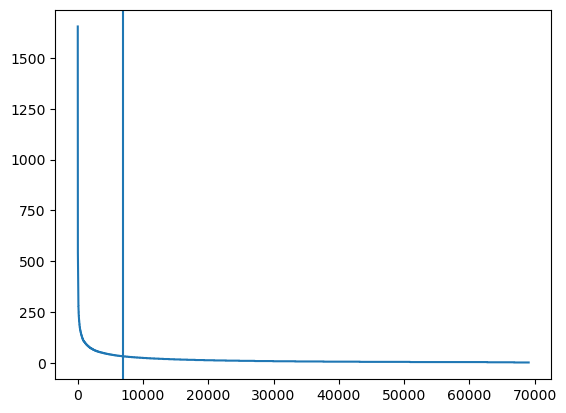

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(0,len(replay_buf.action.unique())), replay_buf.action.value_counts())
#plt.hist(replay_buf.action.value_counts(), bins=100)
cut = np.quantile(replay_buf.action.value_counts(), q=0.9)
cut_idx = np.argmax(replay_buf.action.value_counts()<cut)
plt.axvline(cut_idx)

In [335]:
from recommenders.data_utils.preprocessing import preprocess_train_data

train_end_pad = preprocess_train_data(
        dir="../data/RetailRocket/sampled_train.df",
        padding_id=70852,
        state_len=10,
        incl_reward=False,
        action_to_reward_dict=None,
        pad_pos="end",
    )


In [336]:
train_end_pad

,state,action,next_state,action_type,true_state_len,is_end
742616,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",49432,"[49432, 70852, 70852, 70852, 70852, 70852, 708...",0,1,False
735273,"[49432, 70852, 70852, 70852, 70852, 70852, 708...",49432,"[49432, 49432, 70852, 70852, 70852, 70852, 708...",0,1,False
737711,"[49432, 49432, 70852, 70852, 70852, 70852, 708...",39563,"[49432, 49432, 39563, 70852, 70852, 70852, 708...",0,2,False
726292,"[49432, 49432, 39563, 70852, 70852, 70852, 708...",32776,"[49432, 49432, 39563, 32776, 70852, 70852, 708...",0,3,False
737615,"[49432, 49432, 39563, 32776, 70852, 70852, 708...",52161,"[49432, 49432, 39563, 32776, 52161, 70852, 708...",0,4,False
...,...,...,...,...,...,...
2642325,"[2023, 35206, 17613, 70852, 70852, 70852, 7085...",8618,"[2023, 35206, 17613, 8618, 70852, 70852, 70852...",0,3,False
2755781,"[2023, 35206, 17613, 8618, 70852, 70852, 70852...",55283,"[2023, 35206, 17613, 8618, 55283, 70852, 70852...",0,4,False
2742528,"[2023, 35206, 17613, 8618, 55283, 70852, 70852...",70386,"[2023, 35206, 17613, 8618, 55283, 70386, 70852...",0,5,False
656195,"[2023, 35206, 17613, 8618, 55283, 70386, 70852...",12338,"[2023, 35206, 17613, 8618, 55283, 70386, 12338...",0,6,False


In [337]:
replay_buf

,state,len_state,action,is_buy,next_state,len_next_states,is_done
0,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",1,49432,0,"[49432, 70852, 70852, 70852, 70852, 70852, 708...",1,False
1,"[49432, 70852, 70852, 70852, 70852, 70852, 708...",1,49432,0,"[49432, 49432, 70852, 70852, 70852, 70852, 708...",2,False
2,"[49432, 49432, 70852, 70852, 70852, 70852, 708...",2,39563,0,"[49432, 49432, 39563, 70852, 70852, 70852, 708...",3,False
3,"[49432, 49432, 39563, 70852, 70852, 70852, 708...",3,32776,0,"[49432, 49432, 39563, 32776, 70852, 70852, 708...",4,False
4,"[49432, 49432, 39563, 32776, 70852, 70852, 708...",4,52161,0,"[49432, 49432, 39563, 32776, 52161, 70852, 708...",5,False
...,...,...,...,...,...,...,...
988714,"[2023, 35206, 17613, 70852, 70852, 70852, 7085...",3,8618,0,"[2023, 35206, 17613, 8618, 70852, 70852, 70852...",4,False
988715,"[2023, 35206, 17613, 8618, 70852, 70852, 70852...",4,55283,0,"[2023, 35206, 17613, 8618, 55283, 70852, 70852...",5,False
988716,"[2023, 35206, 17613, 8618, 55283, 70852, 70852...",5,70386,0,"[2023, 35206, 17613, 8618, 55283, 70386, 70852...",6,False
988717,"[2023, 35206, 17613, 8618, 55283, 70386, 70852...",6,12338,0,"[2023, 35206, 17613, 8618, 55283, 70386, 12338...",7,False


In [8]:
# Checkout front padded training set

replay_buf = pd.read_pickle("../data/RetailRocket/replay_buffer_front_pad.df")
replay_buf

,state,action,next_state,is_buy,len_state,len_next_states,is_done
742616,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",49432,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,1,1,False
735273,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",49432,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,1,2,False
737711,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",39563,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,2,3,False
726292,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",32776,"[70852, 70852, 70852, 70852, 70852, 70852, 494...",0,3,4,False
737615,"[70852, 70852, 70852, 70852, 70852, 70852, 494...",52161,"[70852, 70852, 70852, 70852, 70852, 49432, 494...",0,4,5,False
...,...,...,...,...,...,...,...
2642325,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",8618,"[70852, 70852, 70852, 70852, 70852, 70852, 202...",0,3,4,False
2755781,"[70852, 70852, 70852, 70852, 70852, 70852, 202...",55283,"[70852, 70852, 70852, 70852, 70852, 2023, 3520...",0,4,5,False
2742528,"[70852, 70852, 70852, 70852, 70852, 2023, 3520...",70386,"[70852, 70852, 70852, 70852, 2023, 35206, 1761...",0,5,6,False
656195,"[70852, 70852, 70852, 70852, 2023, 35206, 1761...",12338,"[70852, 70852, 70852, 2023, 35206, 17613, 8618...",0,6,7,False


In [9]:
replay_buf.head(10)

,state,action,next_state,is_buy,len_state,len_next_states,is_done
742616,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",49432,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,1,1,False
735273,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",49432,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,1,2,False
737711,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",39563,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,2,3,False
726292,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",32776,"[70852, 70852, 70852, 70852, 70852, 70852, 494...",0,3,4,False
737615,"[70852, 70852, 70852, 70852, 70852, 70852, 494...",52161,"[70852, 70852, 70852, 70852, 70852, 49432, 494...",0,4,5,False
735202,"[70852, 70852, 70852, 70852, 70852, 49432, 494...",52161,"[70852, 70852, 70852, 70852, 49432, 49432, 395...",0,5,6,False
742485,"[70852, 70852, 70852, 70852, 49432, 49432, 395...",32776,"[70852, 70852, 70852, 49432, 49432, 39563, 327...",0,6,7,False
728288,"[70852, 70852, 70852, 49432, 49432, 39563, 327...",49432,"[70852, 70852, 49432, 49432, 39563, 32776, 521...",0,7,8,True
1133190,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",9750,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",1,1,1,False
1135980,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",38594,"[70852, 70852, 70852, 70852, 70852, 70852, 708...",0,1,2,False


In [3]:
class hallo:
   def __init__(self, num):
      self.morgen = num
a = hallo(3)
b = a 

a.morgen = 10
b.morgen

10

In [1]:
import numpy as np
a = np.array([0,1,2,3,4,5,6,7,8,9])
np.quantile(a, 0.9)

8.1

## Dataloader

Dataloader len() argument - it should be number of batches

In [22]:
from torch.utils.data import DataLoader, Dataset

class mydata(Dataset):
    def __init__(self):
        self.a = [1,2,3,4,5,6,7,8,9,10]
    def __len__(self):
        return len(self.a)
    def __getitem__(self, idx):
        return self.a[idx]

ds = mydata()
loader = DataLoader(ds, batch_size=2, shuffle=False,drop_last=False)

In [23]:
for i in loader:
    print(i)

tensor([1, 2])
tensor([3, 4])
tensor([5, 6])
tensor([7, 8])
tensor([ 9, 10])


In [25]:
# Check out: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# The __len__ function returns the number of samples in our dataset.

# But the loader returns the number of batches! So thats alright. 

len(loader)

5

In [5]:
# Load OG embeddings and transform to embedding layer (not matrix)
import torch 
emb_mat = torch.load("../data/SMORL-RetailRocket/OG_gru_embedding_matrix.pt")

torch.save(emb_mat.state_dict()["weight"],f=f"../data/SMORL-RetailRocket/OG_embeddings.pt",)
#emb =torch.nn.Embedding.from_pretrained(, freeze=True)

In [8]:
torch.nn.Embedding.from_pretrained(torch.load("../data/SMORL-RetailRocket/OG_embeddings.pt"), freeze=True)

Embedding(70853, 64)

In [7]:
torch.nn.Embedding.from_pretrained(torch.load("../experiments/GRU4Rec/GRU_opt3_packed_lowerLR/embedding_weights.pt"), freeze=True)

Embedding(70853, 64)

## Analysis on the two parallel models

In [8]:
from recommenders.SQN.sqn_gru import SQN

wrapper = SQN(hidden_dim=10, state_size=10, gru_layers=1,embedding_dim=10, train_pad_embed=True, use_packed_seq=True, learning_rate=0.1, item_num=1000, action_dim=1000, gamma=0.5, device="cuda", )

wrapper.DQN_1.embedding.weight

Parameter containing:
tensor([[-0.0098, -0.0179,  0.0042,  ...,  0.0194,  0.0120, -0.0200],
        [ 0.0081, -0.0013, -0.0018,  ...,  0.0100, -0.0118,  0.0061],
        [-0.0102, -0.0136, -0.0054,  ...,  0.0014,  0.0030,  0.0171],
        ...,
        [-0.0076,  0.0053, -0.0055,  ...,  0.0102, -0.0005,  0.0013],
        [-0.0099, -0.0059,  0.0219,  ...,  0.0069,  0.0211, -0.0180],
        [-0.0059, -0.0076, -0.0171,  ..., -0.0014,  0.0105,  0.0018]],
       requires_grad=True)

In [10]:
wrapper.DQN_2.embedding.weight

# Different init: CHECK.

Parameter containing:
tensor([[-0.0131, -0.0093, -0.0097,  ..., -0.0049,  0.0021,  0.0088],
        [ 0.0085, -0.0021, -0.0020,  ...,  0.0041, -0.0087, -0.0005],
        [-0.0144,  0.0063, -0.0070,  ...,  0.0049, -0.0003,  0.0011],
        ...,
        [-0.0031,  0.0011,  0.0017,  ...,  0.0320, -0.0223,  0.0059],
        [ 0.0195, -0.0018,  0.0097,  ...,  0.0091,  0.0077,  0.0050],
        [ 0.0057,  0.0055,  0.0094,  ...,  0.0038, -0.0087,  0.0093]],
       requires_grad=True)

In [20]:
print(next(wrapper.DQN_1.parameters()).device)
wrapper.send_to_device()
print(next(wrapper.DQN_1.parameters()).device)
wrapper.set_train()
print(wrapper.DQN_1.training)
wrapper.set_eval()
print(wrapper.DQN_1.training)

cuda:0
cuda:0
True
False


In [21]:
a = {"hi":3}
b = {"wo":4}
dict(**a, **b)

{'hi': 3, 'wo': 4}